# Machine learning

In this analysis, I use support vector regression (SVR)
to model the relationship between house price and the
distance to the nearest MRT station.

We focus on a one-feature regression problem in order
to clearly visualize the model behavior and validation results.

Text(0, 0.5, 'House price per unit area')

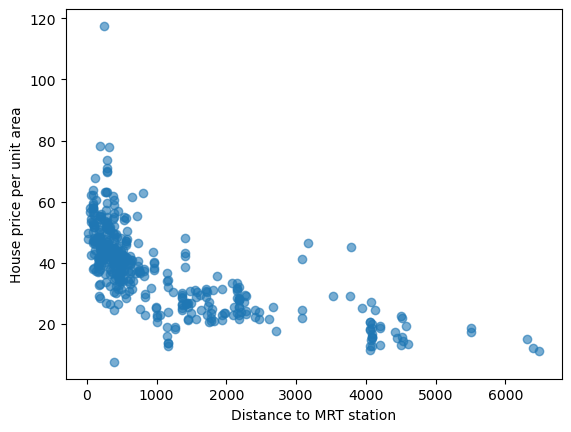

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error

df = pd.read_csv("Real estate valuation data set.csv")

X = df[["X3 distance to the nearest MRT station"]].values
y = df["Y house price of unit area"].values

plt.scatter(X, y, alpha=0.6)
plt.xlabel("Distance to MRT station")
plt.ylabel("House price per unit area")

The scatter plot shows a negative relationship between distance and house price, but the trend is clearly nonlinear.  
This motivates the use of a nonlinear regression model such as SVR with an RBF kernel.

We fit an SVR model to the training data and predict house prices over a dense range of distances.  
The predicted curve is plotted along with the training and test data points.  
This visualization allows us to check whether the model captures the general trend of the data.

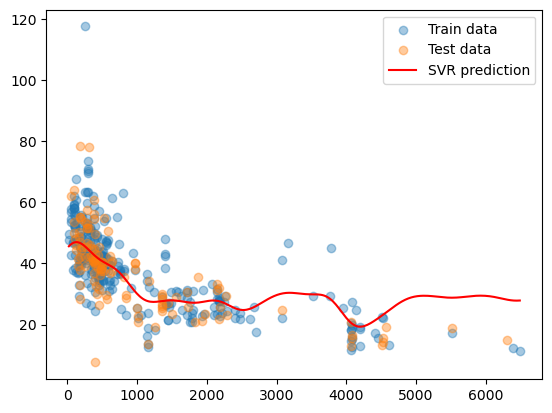

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

svr = SVR(kernel="rbf", gamma=0.00001)
svr.fit(X_train, y_train)

x_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_plot = svr.predict(x_plot)
plt.scatter(X_train, y_train, alpha=0.4, label="Train data")
plt.scatter(X_test, y_test, alpha=0.4, label="Test data")
plt.plot(x_plot, y_plot, color="red", label="SVR prediction")
plt.legend()
plt.show()

<br>
<br>

___
## Validation

In [3]:
y_pred_train = svr.predict(X_train)
y_pred_test  = svr.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test,  y_pred_test)

print(f"MSE (training) = {mse_train}")
print(f"MSE (test)     = {mse_test}")

MSE (training) = 86.21381850294378
MSE (test)     = 73.68281572886973


We evaluate the prediction accuracy using mean squared error (MSE) on both training and test sets:  
- Training MSE: 86.21  
- Test MSE: 73.68  

The test MSE being lower than the training MSE suggests that the model generalizes reasonably well without strong overfitting.

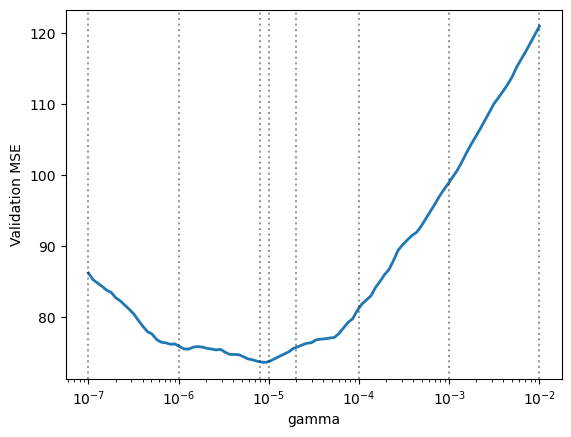

In [4]:
gammas = [0.0000001,0.000001, 0.000008, 0.00001, 0.00002, 0.0001, 0.001, 0.01]

gamma_dense = np.logspace(-7, -2, 100)
mse_dense = []

for g in gamma_dense:
    model = SVR(kernel="rbf", gamma=g)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_dense.append(mean_squared_error(y_test, y_pred))

fig, ax = plt.subplots()

ax.plot(gamma_dense, mse_dense, lw=2)

for g in gammas:
    ax.axvline(g, linestyle='dotted', color='k', alpha=0.4)

ax.set_xscale("log")
ax.set_xlabel("gamma")
ax.set_ylabel("Validation MSE")
plt.show()

We perform a gamma validation to explore the effect of the RBF kernel's gamma parameter on model performance.  
A dense range of gamma values is tested, and vertical dotted lines indicate candidate gamma values.  
- Very small gamma values underfit the data.  
- Very large gamma values overfit the data.  
- Intermediate gamma values achieve the best validation performance.

This gamma validation graph provides a clear rationale for selecting an appropriate gamma for SVR.